##### task2: clustering tasks

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Datasets/kick.csv",na_filter=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41409 entries, 0 to 41408
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   VehOdo                             41409 non-null  int64 
 1   MMRAcquisitionAuctionAveragePrice  41409 non-null  int64 
 2   Make                               41409 non-null  object
 3   WarrantyCost                       41409 non-null  int64 
 4   IsBadBuy                           41409 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ MB


In [3]:
numerical_cols = df.select_dtypes("int64","float64")

for col in numerical_cols:
    print(df[col].describe())

count     41409.000000
mean      71299.961868
std       14723.019112
min         577.000000
25%       61586.000000
50%       73128.000000
75%       82256.000000
max      480444.000000
Name: VehOdo, dtype: float64
count    41409.000000
mean      6135.010433
std       2481.223003
min          0.000000
25%       4273.000000
50%       6105.000000
75%       7783.000000
max      33543.000000
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64
count    41409.000000
mean      1273.011809
std        599.223703
min        462.000000
25%        834.000000
50%       1155.000000
75%       1623.000000
max       7498.000000
Name: WarrantyCost, dtype: float64
count    41409.000000
mean         0.129537
std          0.335797
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: IsBadBuy, dtype: float64


In [4]:
#pre-processing 
#task 2.1.a.

kick_df = df[df['IsBadBuy'] == 1]

In [5]:
kick_df

,VehOdo,MMRAcquisitionAuctionAveragePrice,Make,WarrantyCost,IsBadBuy
21,53323,10294,CHEVROLET,1500,1
22,36459,8662,DODGE,762,1
45,47338,7150,CHRYSLER,975,1
53,49155,6817,CHEVROLET,623,1
73,49632,9375,KIA,623,1
...,...,...,...,...,...
41361,80960,4974,FORD,1243,1
41370,96637,2186,PONTIAC,5913,1
41381,60074,4936,SUZUKI,533,1
41385,74151,7165,CHEVROLET,1506,1


In [6]:
for col in df.columns:
        unique_vals = df[col].unique()
        print(f"Column: {col}")
        print(f"Unique values ({len(unique_vals)}): {unique_vals}")
        print("-" * 50)

Column: VehOdo
Unique values (28599): [51099 48542 46318 ... 65399 45234 66855]
--------------------------------------------------
Column: MMRAcquisitionAuctionAveragePrice
Unique values (9270): [8566 8835 7165 ... 9842 1996 7535]
--------------------------------------------------
Column: Make
Unique values (30): ['DODGE' 'CHRYSLER' 'CHEVROLET' 'PONTIAC' 'MITSUBISHI' 'MAZDA' 'SUZUKI'
 'KIA' 'SATURN' 'TOYOTA' 'FORD' 'BUICK' 'JEEP' 'NISSAN' 'INFINITI'
 'HYUNDAI' 'GMC' 'VOLKSWAGEN' 'HONDA' 'MERCURY' 'OLDSMOBILE' 'ACURA'
 'CADILLAC' 'ISUZU' 'LINCOLN' 'SUBARU' 'SCION' 'LEXUS' 'MINI' 'VOLVO']
--------------------------------------------------
Column: WarrantyCost
Unique values (271): [ 920  834  671 1500  505 1703  837 1003  762  975 1328  482 1181 1155
  533  905 1215  623 1086  754  728 1020  693 2282  825 3667 1740  882
 1623 1763  462 1118 1485 1220  983  569  853 1272  764 1506 1806 1113
 1373 2152  582 1503  923  686  594 1053  803 1413 1243 1918 2712  588
  723 2274  833 1389  630 163

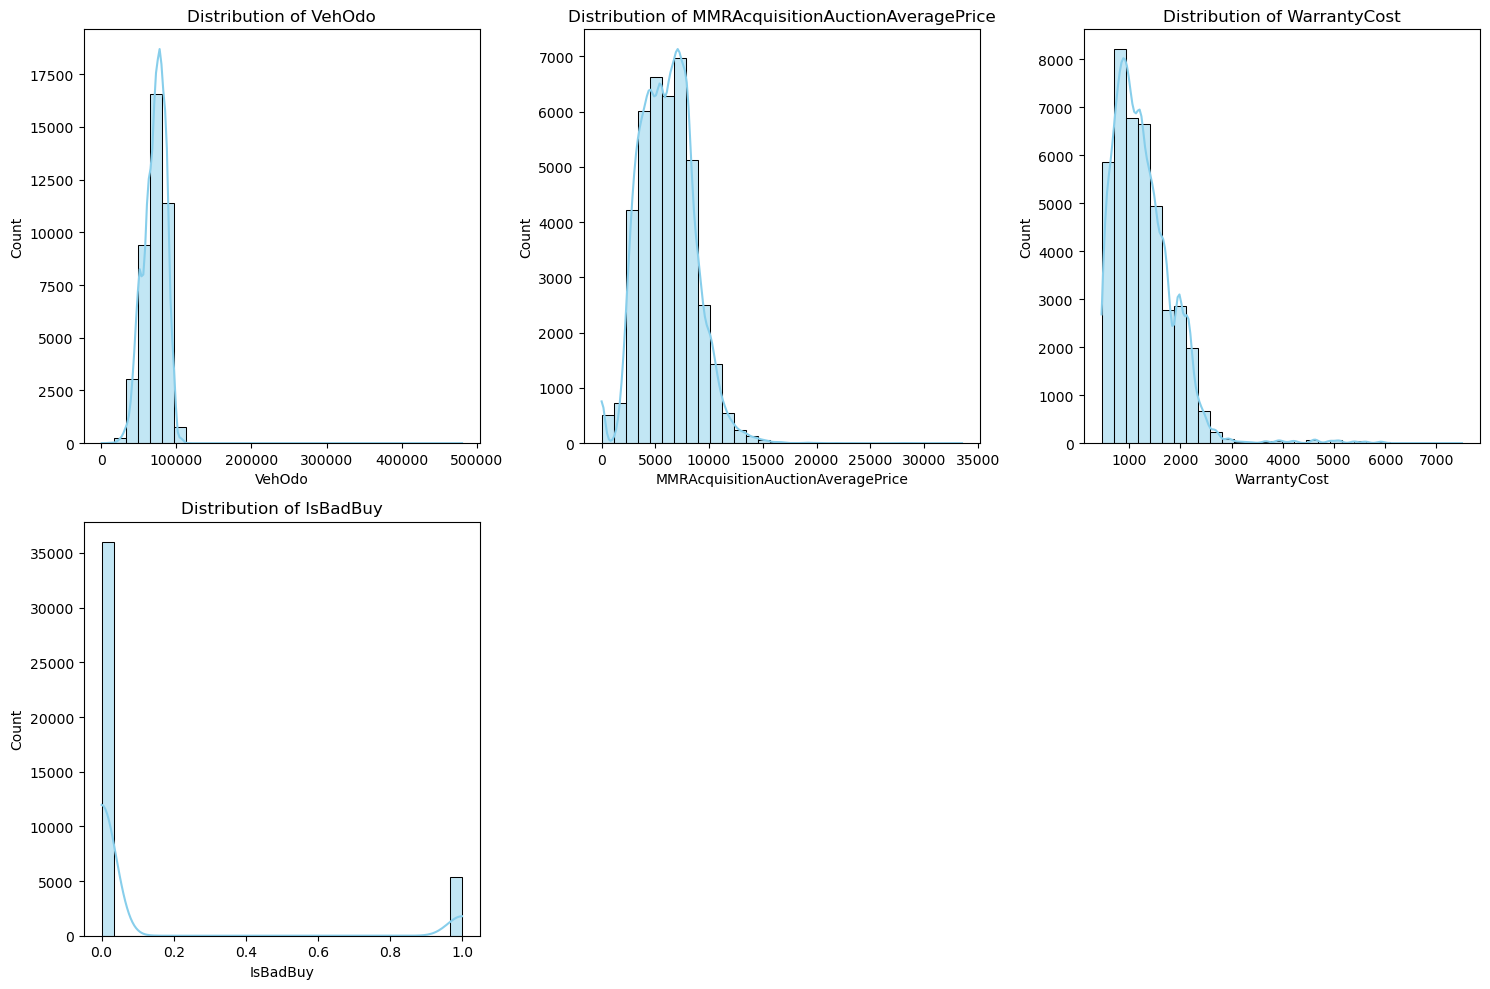

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# control how many plots per "page"
plots_per_page = 12  
ncols = 3

for start in range(0, len(num_cols), plots_per_page):
    subset = num_cols[start:start + plots_per_page]
    nrows = (len(subset) + ncols - 1) // ncols
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
    axes = axes.flatten()
    
    for i, col in enumerate(subset):
        sns.histplot(df[col], kde=True, bins=30, color="skyblue", ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
    
    # turn off empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [8]:
df.columns

Index(['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'Make', 'WarrantyCost',
       'IsBadBuy'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

#exlude Make
df2 = kick_df[['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'WarrantyCost']].copy()

# convert df2 to matrix
X = df2.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

# use 42 instead of 10 for a change
random_state = 42

# set the random state. different random state seeds might 
# result in different centroids locations
model = KMeans(n_clusters=3, random_state=random_state)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 9044.502187139722
Centroid locations:
[-0.94748653 -0.17684847 -0.64122247]
[ 0.69231446 -0.62729657  0.62153394]
[ 0.25375139  1.13628088 -0.04849952]


c:\conda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\conda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\conda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\conda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\conda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [12]:
def inspect_clusters(df, cols, clusters_to_inspect):
    # prepare the column and bin size. Increase bin size to be more specific, 
        #but 20 is more than enough
    n_bins = 20  
    for cluster in clusters_to_inspect:
        print("Distribution for cluster {}".format(cluster))
        
        # create subplots
        fig, ax = plt.subplots(nrows=3)
        ax[0].set_title("Cluster {}".format(cluster))
        
        for j, col in enumerate(cols):
            # create the bins
            bins = np.linspace(min(df[col]), max(df[col]), 20)
            
            # plot distribution of the cluster using histogram
            sns.histplot(df[df['Cluster_ID'] == cluster][col], bins=bins, 
                         ax=ax[j], kde=True, stat="density")
            
            # plot the normal distribution with a black line
            sns.kdeplot(data=df[col], ax=ax[j], color="k")
                     
        plt.tight_layout()
        plt.show()

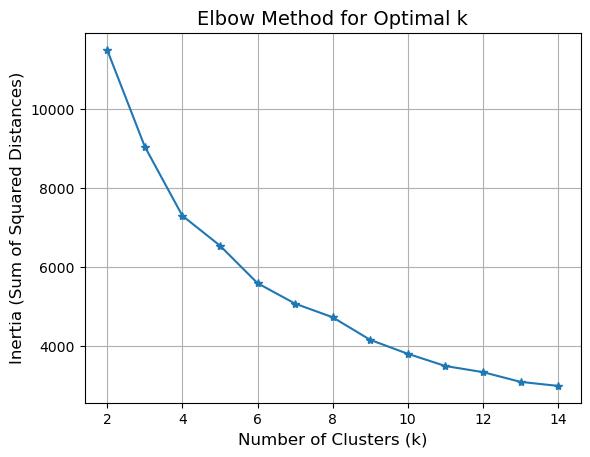

In [17]:
#task 2.2.c

#apply elbow method

# list to save the clusters and cost
clusters = []
inertia_vals = []

#choosing the search range for k (clusters)
for k in range(2, 15, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=random_state)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia (Sum of Squared Distances)", fontsize=12)
plt.title("Elbow Method for Optimal k", fontsize=14)
plt.grid(True)
    
# plot the inertia vs K values
plt.plot(range(2,15,1), inertia_vals, marker='*')
plt.show()

In [18]:
#apply silhouette score

from sklearn.metrics import silhouette_score

from sklearn.metrics import silhouette_score

for k in [4, 5, 6]:
    model = KMeans(n_clusters=k, random_state=random_state)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Silhouette score for k={k}: {score:.3f}")

Silhouette score for k=4: 0.287
Silhouette score for k=5: 0.268
Silhouette score for k=6: 0.271


Sum of intra-cluster distance: 7294.210202054761
Centroid locations:
[ 0.47573562 -0.54340273 -0.24639082]
[ 0.70029344 -0.56106981  1.62703881]
[0.24571769 1.26906032 0.0340663 ]
[-1.24520213 -0.01485598 -0.64572538]
Cluster membership
Cluster_ID
0    1900
3    1433
2    1201
1     830
Name: count, dtype: int64


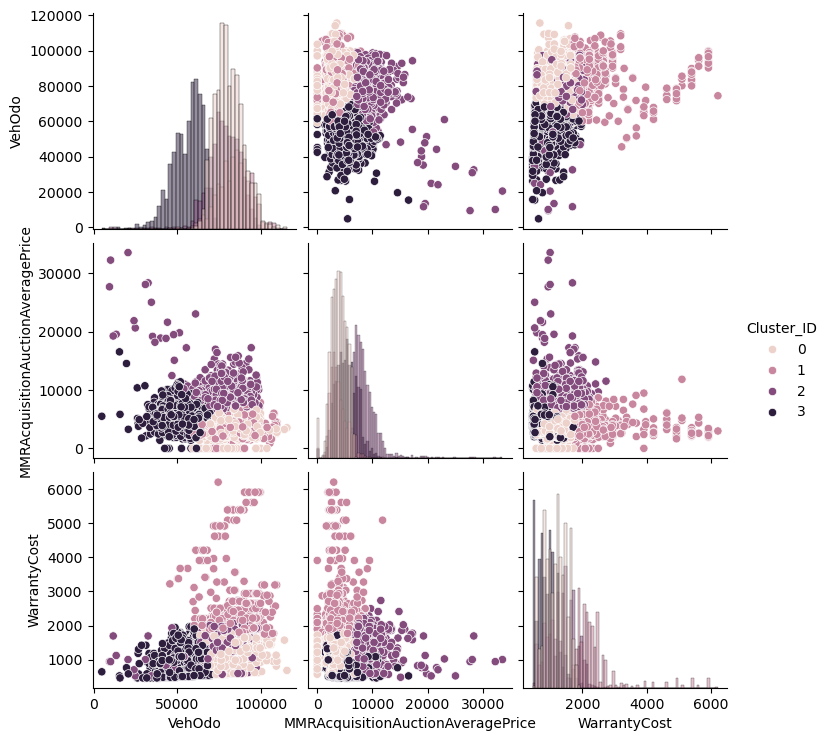

In [ ]:
#pairplot with optimal k value

# visualisation of K=4 clustering solution
model = KMeans(n_clusters=4, random_state=random_state)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
df2['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df2, hue='Cluster_ID', diag_kind='hist')
plt.show()

In [ ]:
#create cluster distribution plots

def inspect_clusters(df, cols, clusters_to_inspect):
    # prepare the column and bin size.
    n_bins = 20  
    for cluster in clusters_to_inspect:
        print("Distribution for cluster {}".format(cluster))
        
        # create subplots
        fig, ax = plt.subplots(nrows=3)
        ax[0].set_title("Cluster {}".format(cluster))
        
        for j, col in enumerate(cols):
            # create the bins
            bins = np.linspace(min(df[col]), max(df[col]), 20)
            
            # plot distribution of the cluster using histogram
            sns.histplot(df[df['Cluster_ID'] == cluster][col], bins=bins, 
                         ax=ax[j], kde=True, stat="density")
            
            # plot the normal distribution with a black line
            sns.kdeplot(data=df[col], ax=ax[j], color="k")
                     
        plt.tight_layout()
        plt.show()

Distribution for cluster 0


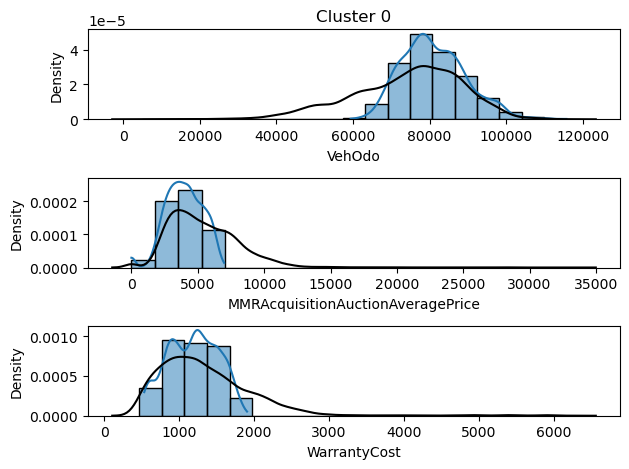

Distribution for cluster 1


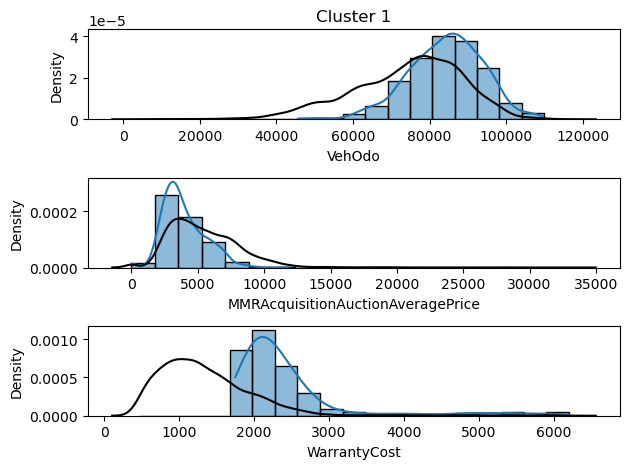

Distribution for cluster 2


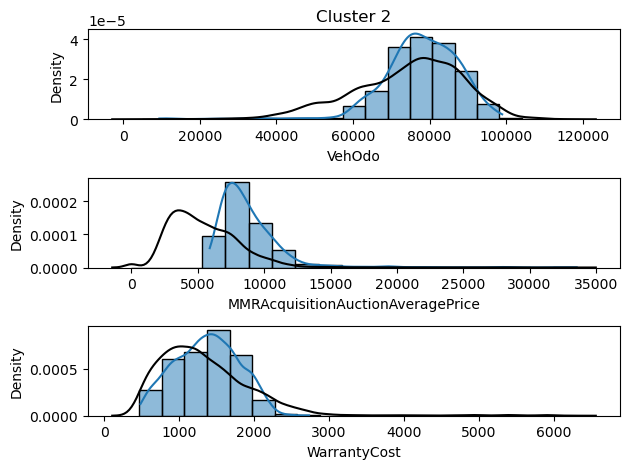

Distribution for cluster 3


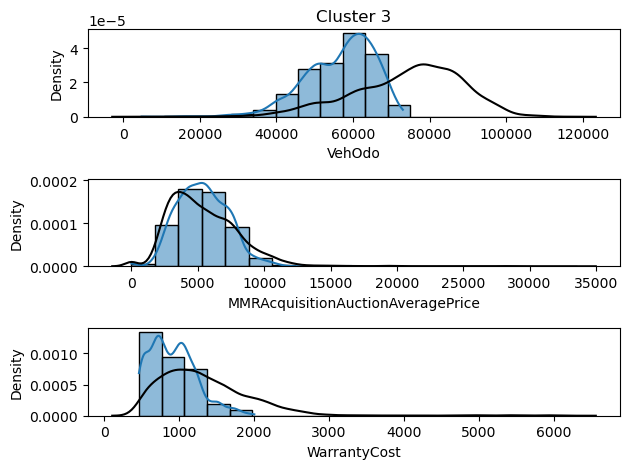

In [21]:
# Columns to inspect
cols = ['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'WarrantyCost']

# Inspect all clusters (0–3)
inspect_clusters(df2, cols, clusters_to_inspect=[0, 1, 2, 3])

In [ ]:
#task 2.4.



In [22]:
df2

,VehOdo,MMRAcquisitionAuctionAveragePrice,WarrantyCost,Cluster_ID
21,53323,10294,1500,2
22,36459,8662,762,3
45,47338,7150,975,3
53,49155,6817,623,3
73,49632,9375,623,3
...,...,...,...,...
41361,80960,4974,1243,0
41370,96637,2186,5913,1
41381,60074,4936,533,3
41385,74151,7165,1506,2


In [24]:
#profile the “bad buys”

df3 = df2.copy()
df3['IsBadBuy'] = df['IsBadBuy']

badbuy_summary = df3.groupby('Cluster_ID')['IsBadBuy'].agg(
    Total_Cars='count',
    BadBuys='sum'
)
badbuy_summary['BadBuy_Rate (%)'] = (badbuy_summary['BadBuys'] / badbuy_summary['Total_Cars']) * 100
print(badbuy_summary)

            Total_Cars  BadBuys  BadBuy_Rate (%)
Cluster_ID                                      
0                 1900     1900            100.0
1                  830      830            100.0
2                 1201     1201            100.0
3                 1433     1433            100.0
